In [1]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

from sklearn import datasets
from sklearn.model_selection import train_test_split  
from sklearn import metrics

In [2]:
# Importing the data set
df = pd.read_csv("BostonHousing.csv")

This data frame contains the following columns:

    crim : per capita crime rate by town.

    zn: proportion of residential land zoned for lots over 25,000 sq.ft.

    indus: proportion of non-retail business acres per town.

    chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

    nox: nitrogen oxides concentration (parts per 10 million).

    rm: average number of rooms per dwelling.

    age: proportion of owner-occupied units built prior to 1940.

    dis: weighted mean of distances to five Boston employment centres.

    rad: index of accessibility to radial highways.

    tax: full-value property-tax rate per $10,000.

    ptratio: pupil-teacher ratio by town.

    black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

    lstat: lower status of the population (percent).

    medv: median value of owner-occupied homes in $1000s.

### Question 1: Describe the data:
1. What missing values are there?
2. What are the summary statistics of the numerical features?
3. What do the distributions of the features look like?

In [3]:
# What are the missing values?
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [4]:
# Standardize the data set
import pandas as pd
from sklearn import preprocessing

names = df.columns
scaler = preprocessing.StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=names)

#### Comment: No NaN values in the dataset

In [5]:
# Summary Statistics:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-3.510587e-17,-2.808469e-16,-4.563763e-17,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16,-5.195668e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


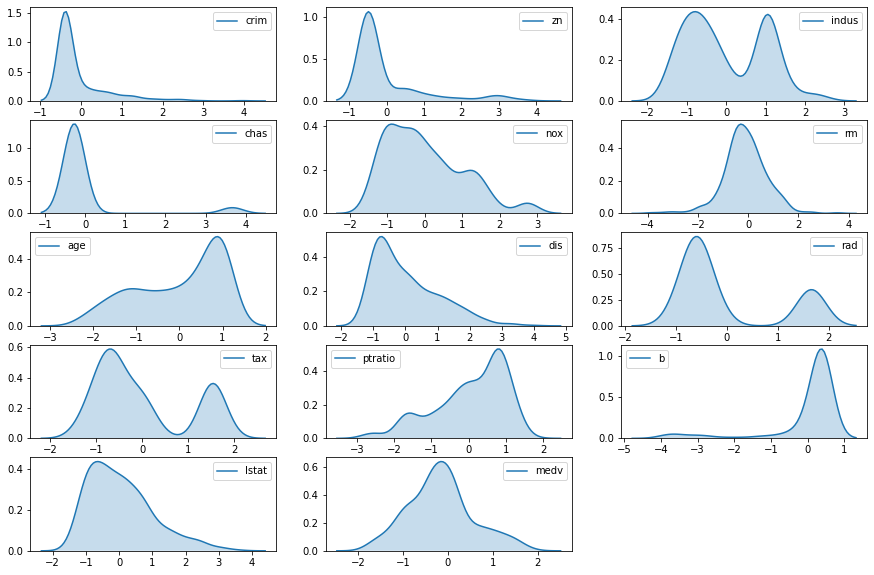

In [20]:
# Plotting the distributions of the data:
plt.figure(figsize = (15,10))

for i in np.arange(1,len(df.columns)+1):
    plt.subplot(5,3,i)
    sns.kdeplot( df.iloc[:,i-1], shade = True)
    plt.legend()



#### These might be outliers 

In [7]:
df = df[ ((df['medv'] < 2) & (df['crim']<4)) 

### 2. What features are most correlated with housing price?

In [8]:
# Correlation matrix between the columns:

corr = df.corr()
display(corr)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.253435,0.515792,-0.068347,0.539857,-0.267236,0.433000,-0.471635,0.793301,0.737453,0.348703,-0.450318,0.570437,-0.542852
zn,-0.253435,1.000000,-0.526009,-0.057318,-0.510137,0.308741,-0.563518,0.683921,-0.299761,-0.293271,-0.368792,0.172417,-0.423546,0.418368
indus,0.515792,-0.526009,1.000000,0.044693,0.765550,-0.385516,0.634265,-0.716409,0.586428,0.707990,0.365107,-0.356753,0.628381,-0.614565
chas,-0.068347,-0.057318,0.044693,1.000000,0.097488,0.048543,0.080244,-0.089383,-0.027121,-0.060638,-0.116821,0.039603,0.001404,0.079605
nox,0.539857,-0.510137,0.765550,0.097488,1.000000,-0.315160,0.722528,-0.765361,0.605607,0.662827,0.178539,-0.384432,0.608538,-0.560889
rm,-0.267236,0.308741,-0.385516,0.048543,-0.315160,1.000000,-0.254131,0.252337,-0.165708,-0.242493,-0.225648,0.083179,-0.579225,0.601762
age,0.433000,-0.563518,0.634265,0.080244,0.722528,-0.254131,1.000000,-0.739156,0.441292,0.491788,0.267347,-0.268783,0.644164,-0.525729
dis,-0.471635,0.683921,-0.716409,-0.089383,-0.765361,0.252337,-0.739156,1.000000,-0.484181,-0.528555,-0.254610,0.294091,-0.544015,0.405892
rad,0.793301,-0.299761,0.586428,-0.027121,0.605607,-0.165708,0.441292,-0.484181,1.000000,0.907165,0.445908,-0.442543,0.492864,-0.487962
tax,0.737453,-0.293271,0.707990,-0.060638,0.662827,-0.242493,0.491788,-0.528555,0.907165,1.000000,0.433274,-0.440101,0.547426,-0.581251


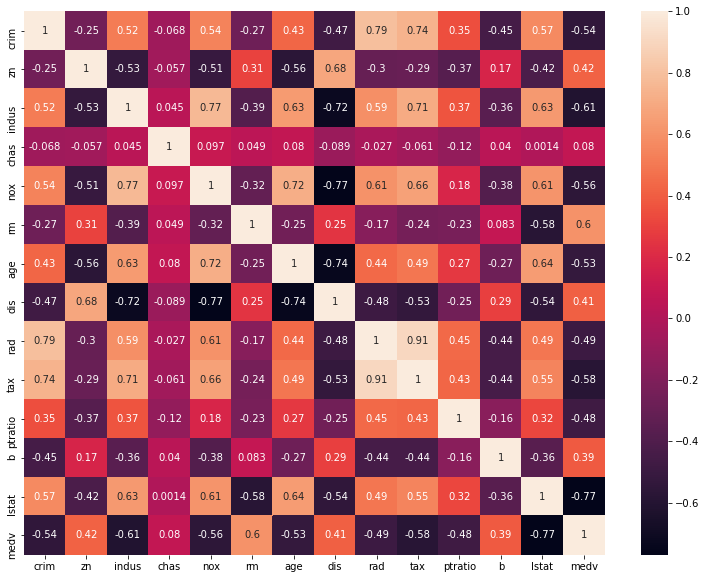

In [9]:
plt.figure(figsize = (13,10))
ax = sns.heatmap(corr, annot=True)

In [10]:
# Sorting the absolute values of the correlations:

corr['medv'].abs().sort_values(ascending= False)

medv       1.000000
lstat      0.769090
indus      0.614565
rm         0.601762
tax        0.581251
nox        0.560889
crim       0.542852
age        0.525729
rad        0.487962
ptratio    0.476324
zn         0.418368
dis        0.405892
b          0.390479
chas       0.079605
Name: medv, dtype: float64

#### Highly correlated with Housing Prices (medv):
1. Lstat (Negative Correlation): lower status of the population (percent)
   Intuative since housing prices would decrease in the neighborhoods with lower status
   
2. rm: average number of rooms per dwelling
    Bigger houses = Expensive Houses

3. Ptratio: pupil-teacher ratio by town:
   Might just be a proxy for better schools

### Generate a new feature based on the existing dataset that you think would help explain housing prices and plot its relationship with housing price

Candidates for new features:

a. lstat and crim might represent similar information and can be combined together in some    feature. They have a positive correlation of 0.46, which might 

b. zn has  high negeative correlation with indus, nox and age, and can probably be used as    proxy for these three features: Lstat has a high correlation amomg these factors so doesn't have to be included

In [11]:
# Inserting the relavant features into the model:
X = df[['lstat','rm','ptratio', 'zn']]
y = df['medv']

### With scikit-learn, develop a model with the training data and make predictions on the test data. Plot your predictions.

In [12]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [13]:
print(f"Head of features:{X.head()}")

print(f"Head of Model:{y.head()}")

Head of features:      lstat        rm   ptratio        zn
0 -1.075562  0.413672 -1.459000  0.284830
1 -0.492439  0.194274 -0.303094 -0.487722
2 -1.208727  1.282714 -0.303094 -0.487722
3 -1.361517  1.016303  0.113032 -0.487722
4 -1.026501  1.228577  0.113032 -0.487722
Head of Model:0    0.159686
1   -0.101524
2    1.324247
3    1.182758
4    1.487503
Name: medv, dtype: float64


In [14]:
# split into test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(X_train, y_train)

In [16]:
y_pred = regressor.predict(X_test)

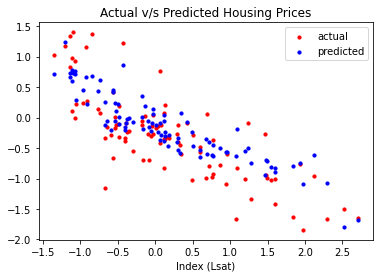

In [17]:
viz_train = plt
viz_train.scatter(X_test['lstat'], y_test, color='red', s = 10, label = 'actual')
viz_train.scatter(X_test['lstat'], regressor.predict(X_test), color='blue', s = 10, label = 'predicted')
viz_train.title('Actual v/s Predicted Housing Prices')
viz_train.xlabel('Index (Lsat)')
viz_train.legend()
viz_train.show()

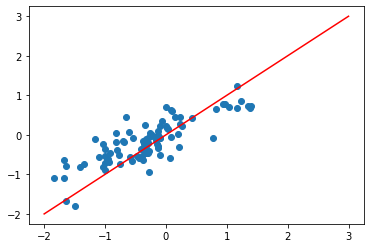

In [18]:
plt.scatter(y_test, y_pred)
x = np.linspace(-2, 3, 10)
plt.plot(x, x, linestyle='solid', color='red')

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.637009408497559